/tmp/ipython-input-1780112375.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:18:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Accuracy: 0.56


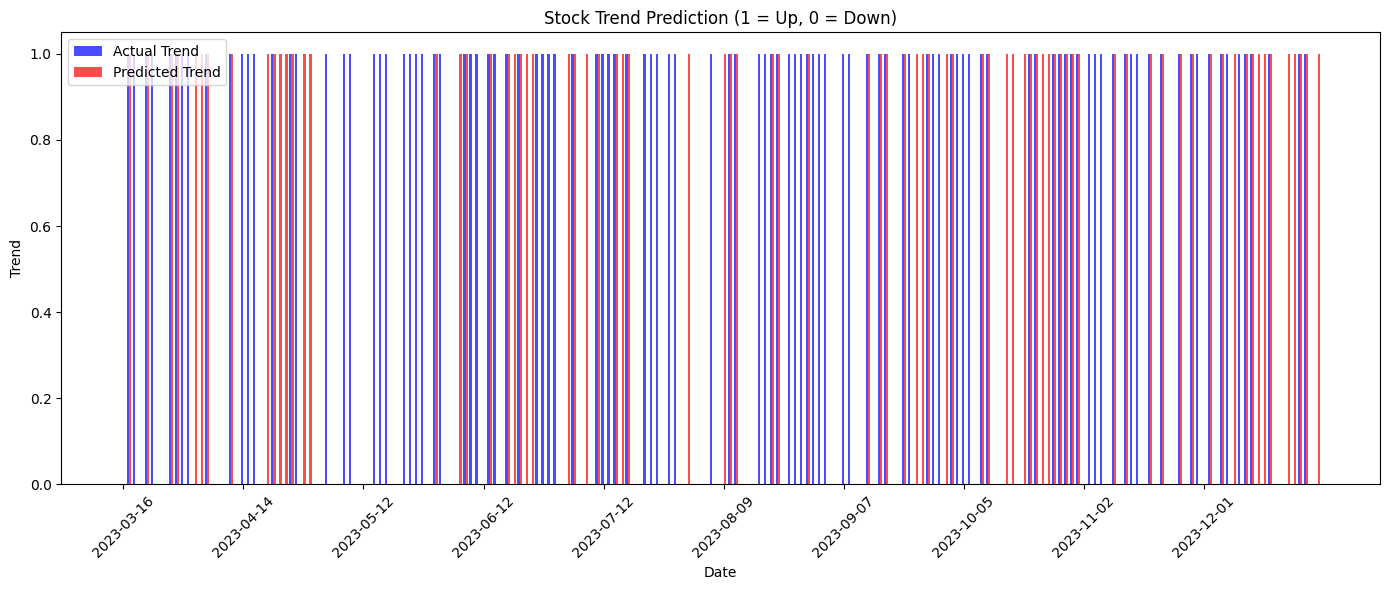

In [3]:
# 📌 Stock Trend Prediction with XGBoost (Bar Chart Visualization)

import yfinance as yf
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Download stock data
data = yf.download("AAPL", start="2020-01-01", end="2023-12-31")

# Step 2: Feature engineering
data['Return'] = data['Close'].pct_change()
data['MA5'] = data['Close'].rolling(5).mean()
data['MA10'] = data['Close'].rolling(10).mean()
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)

X = data[['Return','MA5','MA10']]
y = data['Target']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Step 4: Train XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 5: Predictions
preds = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, preds))

# Step 6: Bar Chart Visualization
dates = data.index[-len(y_test):]
x = np.arange(len(dates))  # numeric positions for bars
width = 0.35  # bar width

plt.figure(figsize=(14,6))

# Actual trend bars
plt.bar(x - width/2, y_test.values, width, label="Actual Trend", color='blue', alpha=0.7)

# Predicted trend bars
plt.bar(x + width/2, preds, width, label="Predicted Trend", color='red', alpha=0.7)

plt.xticks(x[::20], [d.strftime('%Y-%m-%d') for d in dates[::20]], rotation=45)  # show every 20th date
plt.title("Stock Trend Prediction (1 = Up, 0 = Down)")
plt.xlabel("Date")
plt.ylabel("Trend")
plt.legend()
plt.tight_layout()
plt.show()
